# Run the whole deltas algorithm

In [46]:
%load_ext autoreload
%autoreload 2

import ipywidgets
from deltas.pipeline import data, classifier, evaluation
from deltas.model import base, downsample
import deltas.plotting.plots as plots

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

In [47]:
N1 = 10000
N2 = 10
# Gaussian (not always seperable)
data_clf = data.get_data(
    m1=[-5, -5],
    m2=[2, 2],
    cov1=[[1, 0], [0, 1]],
    cov2=[[1, 0], [0, 1]],
    N1=N1,
    N2=N2,
    scale=False
    )

## Get Classifier

clf


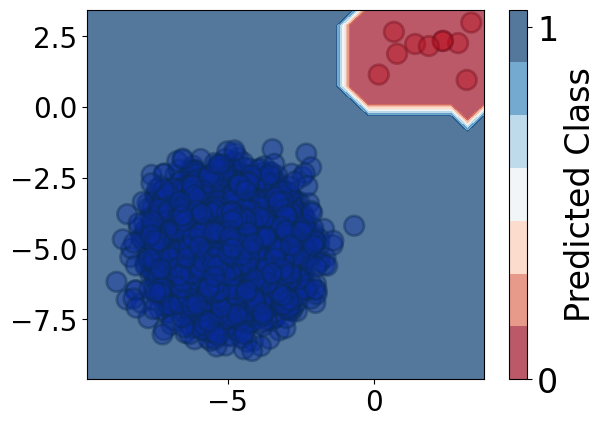

SMOTE


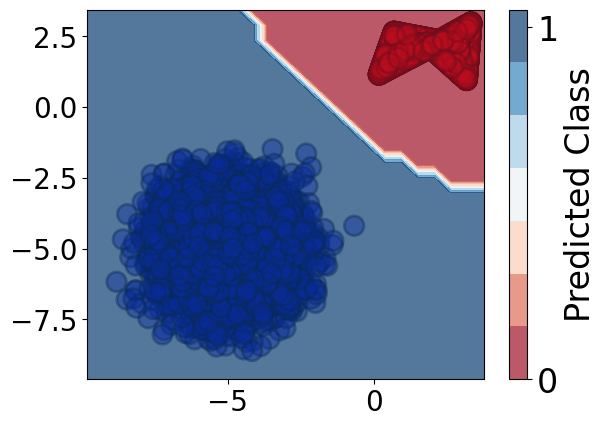

In [48]:
model = 'SVM-linear'
model = 'SVM-rbf'
# model = 'Linear'
# model = 'MLP'

balance_clf = True
# balance_clf = False

classifiers_dict = classifier.get_classifier(
                      data_clf=data_clf,
                      model=model,
                      balance_clf=balance_clf)
data_clf['clf'] = classifiers_dict['original']                    

## Fit deltas

deltas init: [0.999999999999999, 0.4608201646124237]
eq. 7 can be satisfied: True
Grid Search Optimisation Complete
    delta1 : 0.005300000000000001 
    delta2: 0.520713292432709
    constraint satisfied: True


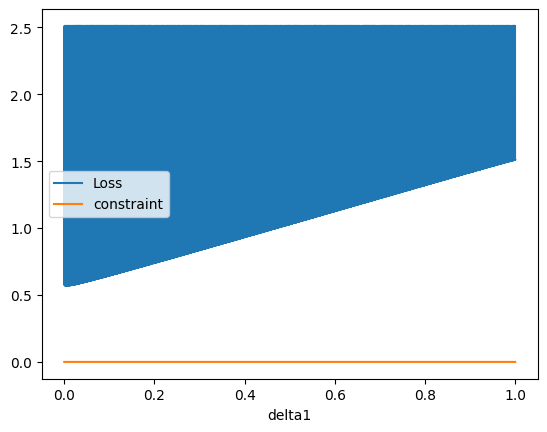

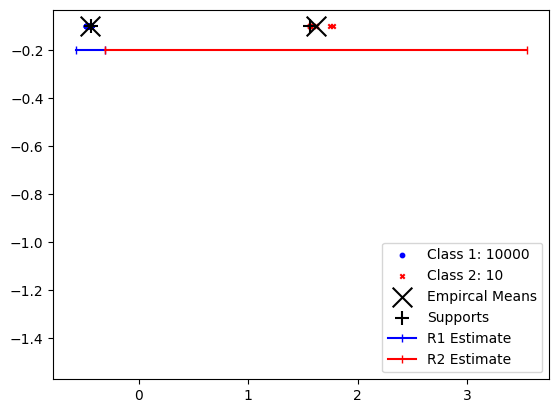

In [49]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
# deltas_model = downsample.downsample_deltas(
#     clf).fit(X, y, _print=True, _plot=True, max_trials=10000)
deltas_model = base.base_deltas(
    clf).fit(X, y, grid_search=True, _print=True, _plot=True)

## Plot training data information

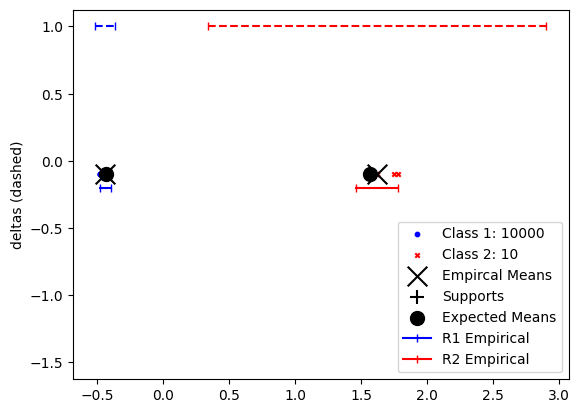

In [50]:
deltas_model.plot_data(data_clf)

## See how classifier's boudnary changes with delta

In [51]:
@ipywidgets.interact_manual(
    delta2=(0.00001, 1., 0.00001),
)
def plot(delta2=1):
    ax, _ = plots._get_axes(None)
    plots.plot_classes(data_clf['data'], ax=ax)
    def pred_func(X): return deltas_model._predict_given_delta2(X, delta2)
    plots.plot_decision_boundary_custom_pred(
        pred_func, data_clf['data'], ax=ax, probs=False)
    ax.set_title(f'delta_class0 = {delta2}')
    plots.plt.show()

interactive(children=(FloatSlider(value=1.0, description='delta2', max=1.0, min=1e-05, step=1e-05), Button(des…

## Show parameters

In [52]:
deltas_model.print_params()

Parameters
                R:  1.778295150403165
                N1: 10000
                N2: 10
                R1: 0.03988218990823822
                R2: 0.15874199883562734
                M:  1.9992396677551083
                D:  2.058884098105133
                C1: 1
                C2: 1


# Evaluation on test data

original accuracy: 0.9796
SMOTE accuracy: 1.0
deltas accuracy: 1.0

original F1: 0.9791751735402205
SMOTE F1: 1.0
deltas F1: 1.0

original precision1 (red): 0.9607993850883936
SMOTE precision1 (red): 1.0
deltas precision1 (red): 1.0

original precision2 (blue): 1.0
SMOTE precision2 (blue): 1.0
deltas precision2 (blue): 1.0

original


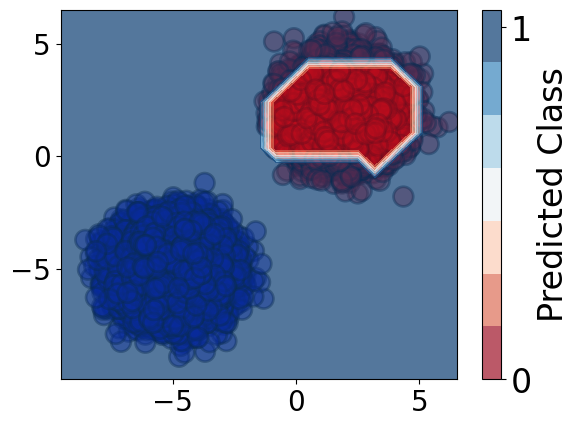

SMOTE


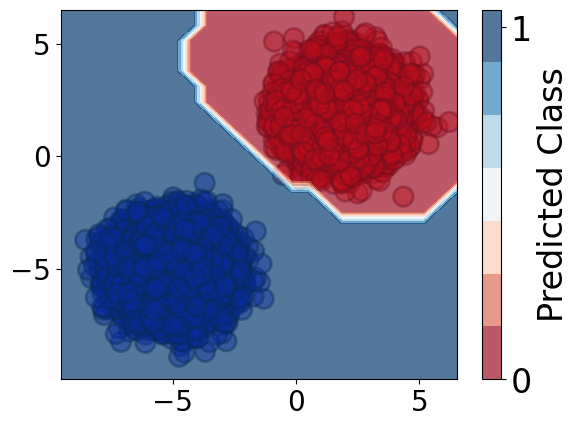

deltas


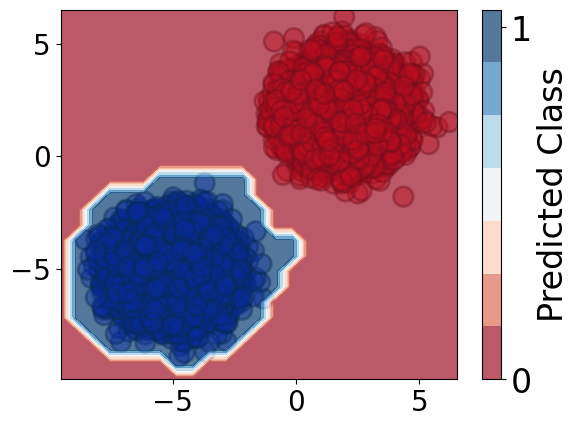

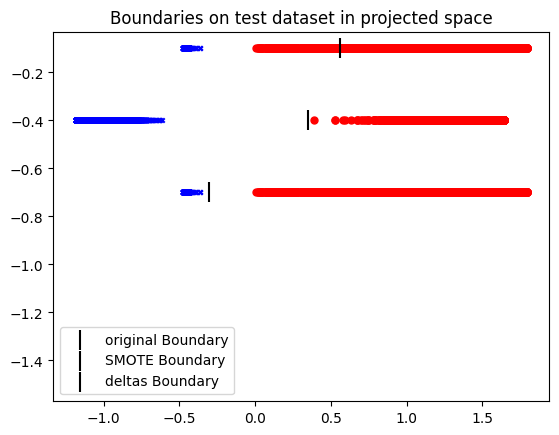

In [53]:
classifiers_dict['deltas'] = deltas_model
evaluation.eval_test(classifiers_dict,
                       data_clf['data_test'], _print=True, _plot=True)